# Модель эволюции Бака-Снеппена

## Реализация
Каждый элемент вектора, узел $i$, имеет двух соседей, одного правого и одного левого, обычно узел $i+1$ и $i-1$.
Мы создадим два вектора, один с правыми индексами и один с левыми индексами.
Элемент в позиции $i$ в нашем правом индексном векторе будет иметь значение $i+1$, за исключением границы.
Аналогично для указателя слева.
По мере того как моделирование повторяется во времени, мы будем для каждой итерации сохранять минимальный коэффициент пригодности в этой итерации, а также возраст каждого вида. Мы можем интерпретировать возраст как годы, прошедшие с момента закрепления мутации.
Возраст рассчитывается путем увеличения возраста на единицу для каждого раунда и установки его на ноль, когда вид "мутирует". 

In [8]:
using PyPlot
using Plots


In [9]:
N = 1000  # Количество видов.
t_end = 100000  # Время окончания симуляции.
t_space = 1:t_end  # Итерируемся по временным шагам. В Julia индексация начинается с 1.

# Создаем фактор приспособленности видов.
# rand(N) возвращает вектор размера N с случайными элементами между 0.0 и 1.0.
species = rand(N)

# Фиксируем граничные условия
# ir и il - правые и левые индексы соответственно
# ir[i] дает правый индекс в позиции i, обычно i+1.
#
# `collect` преобразует диапазон, например 2:N, в массив.
# Это имеет ту же цель, что и `list(range(2, N))` в Python.
ir = collect(2:N+1)
il = collect(0:N-1)
ir[N] = 1  # Правый от самого правого - левый в кольце
il[1] = N  # Левый от самого левого - правый в кольце

"""
Симулируем виды в течение заданного временного интервала.
Возвращаем возраст каждого вида на каждом временном шаге и
минимальный фактор приспособленности на каждом временном шаге.
"""
function simulate!(species, t_space)
    age = zeros(N, t_end)
    mins = zeros(t_end)
    
    for t in t_space[2:end]
        age[:, t] = age[:, t-1] .+ 1
        # Мы хотим найти наименее приспособленный вид.
        # `findmin` возвращает минимальное значение и индекс этого значения.
        mins[t], index_min = findmin(species)
        species[index_min] = rand()
        species[ir[index_min]] = rand()  # Справа
        species[il[index_min]] = rand()  # Слева
        
        age[index_min, t] = 0
        age[ir[index_min], t] = 0  # Справа
        age[il[index_min], t] = 0  # Слева
    end
    
    return age, mins
end


simulate!

Замеряем время выполнения симуляции и получаем возраст каждого вида на каждом временном шаге, а также минимальный фактор выживаемости на каждом временном шаге.

In [10]:
@time age, mins = simulate!(species, t_space);

  1.631681 seconds (1.89 M allocations: 2.299 GiB, 14.84% gc time, 1.13% compilation time)


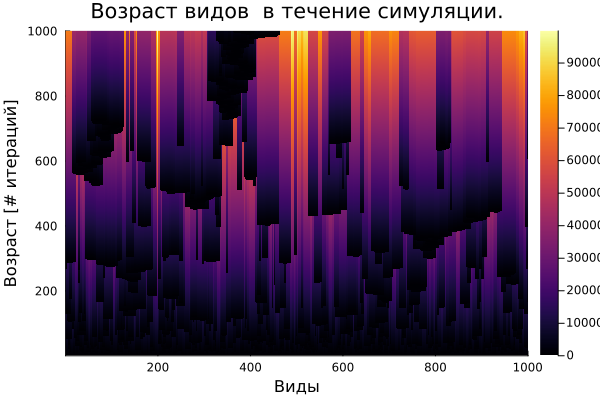

In [11]:
heatmap(transpose(age[:, 1:100:end]), vmax=30000)
xaxis!("Виды")
yaxis!("Возраст [# итераций]")
title!("Возраст видов  в течение симуляции.")


На рисунке выше показан возраст вида с течением времени.
Можно рассматривать кластеры как устойчивые подэкосистемы. Эволюции, как правило, локализуются как во времени, так и в пространстве.
Если важный вид в стабильной подэкосистеме внезапно мутирует, эффект этой единственной мутации распространяется по всей подэкосистеме, приводя к мутации у каждого вида, населяющего эту подэкосистему.
Эта последовательность массовых эволюций называется лавинами, явление, которое много изучается в области статистической физики.  

Теперь мы рассмотрим минимальный коэффициент пригодности в экосистеме как функцию времени.
Мы видим, что он быстро увеличивается, а затем сужается до асимптотически стабильного значения, примерно равного 0.6.
Это объясняет локализацию эволюций, которые мы видим на возрастном графике.
Когда происходит мутация, вероятность того, что три новых сгенерированных значения будут ниже любого другого значения, довольно высока, по крайней мере, через некоторое время, когда минимальное значение будет высоким.